# Plotbee Video Demo 

This is to show the capabilities of plotbee. The objective of this notebook is to show:
   * Loading Detections and Video

### Load Dependecies

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from plotbee.body import Body
from plotbee.frame import Frame
from plotbee.video import Video
from plotbee.track import Track
from plotbee.utils import read_json
import plotbee.videoplotter as vplt
from collections import defaultdict
import cv2
from os.path import join
from plotbee.tracking import hungarian_tracking_with_prediction

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]

In [ ]:
import sys
sys.path

## Loading Detections

In [4]:
dataroot='/home/jchan/plotbee/data'

In [5]:
video = Video.load(join(dataroot,"C02_170622120000_skeleton.json"))

100%|██████████| 6000/6000 [00:01<00:00, 4164.33it/s]


`print(video)` shows the video name, detection file and lenght of the video in frames. 

In [5]:
print(video)

Video(name=C02_170622120000.mp4, detections=merged_C02_170622120000_detections.json, len=6000)


In [6]:
len(video) # amount of frames 

6000

The video object is an iterable, that returns frames.

In [6]:
type(video), type(video[0])

(plotbee.video.Video, plotbee.frame.Frame)

Each frame has a list of detections (Body).

In [33]:
d={4:6, 6:8}

In [37]:
{k:v for k,v in d.items()}

{4: 6, 6: 8}

In [7]:
video[0]

Frame: 0
Body(id=-1, parts={1: [(992, 1124)], 2: [(1000, 884)], 3: [(996, 944)], 4: [(1052, 816)], 5: [(960, 836)])
Body(id=-1, parts={1: [(1744, 1056)], 2: [(1856, 1276)], 3: [(1816, 1216)], 4: [(1948, 1272)], 5: [(1948, 1252)])
Body(id=-1, parts={1: [(736, 540)], 2: [(644, 784)], 3: [(668, 728)], 4: [(584, 780)], 5: [(672, 828)])
Body(id=-1, parts={1: [(404, 280)], 2: [(644, 376)], 3: [(576, 336)], 4: [(664, 452)], 5: [(728, 364)])
Body(id=-1, parts={1: [(592, 992)], 2: [(516, 756)], 3: [(532, 816)], 4: [(568, 708)], 5: [(480, 700)])
Body(id=-1, parts={1: [(884, 732)], 2: [(724, 920)], 3: [(768, 868)], 4: [(644, 892)], 5: [(728, 944)])
Body(id=-1, parts={1: [(1884, 612)], 2: [(1720, 780)], 3: [(1768, 764)], 4: [(1652, 732)], 5: [(1684, 828)])
Body(id=-1, parts={1: [(880, 460)], 2: [(916, 696)], 3: [(916, 644)], 4: [(880, 724)], 5: [(932, 716)])
Body(id=-1, parts={1: [(2108, 1212)], 2: [(2144, 1020)], 3: [(2084, 1032)], 4: [(2192, 1100)], 5: [(2196, 1056)])
Body(id=-1, parts={1: [(213

In [6]:
frame0 = video[0]
body = frame0[0]

type(frame0), type(body)

(plotbee.frame.Frame, plotbee.body.Body)

In [8]:
body.parts

{1: [(992, 1124)],
 2: [(1000, 884)],
 3: [(996, 944)],
 4: [(1052, 816)],
 5: [(960, 836)]}

#### video slicing
You can slice videos as list

In [9]:
short_video = video[:10]
double_speed_video = video[::2]

len(short_video), len(double_speed_video)

(10, 3000)

## Plotting Video

The Video object hold the detection data, to plot images we need to specify the video location.

In [6]:
video.load_video(join(dataroot,'C02_170622120000.mp4'))

### Plot a Frame

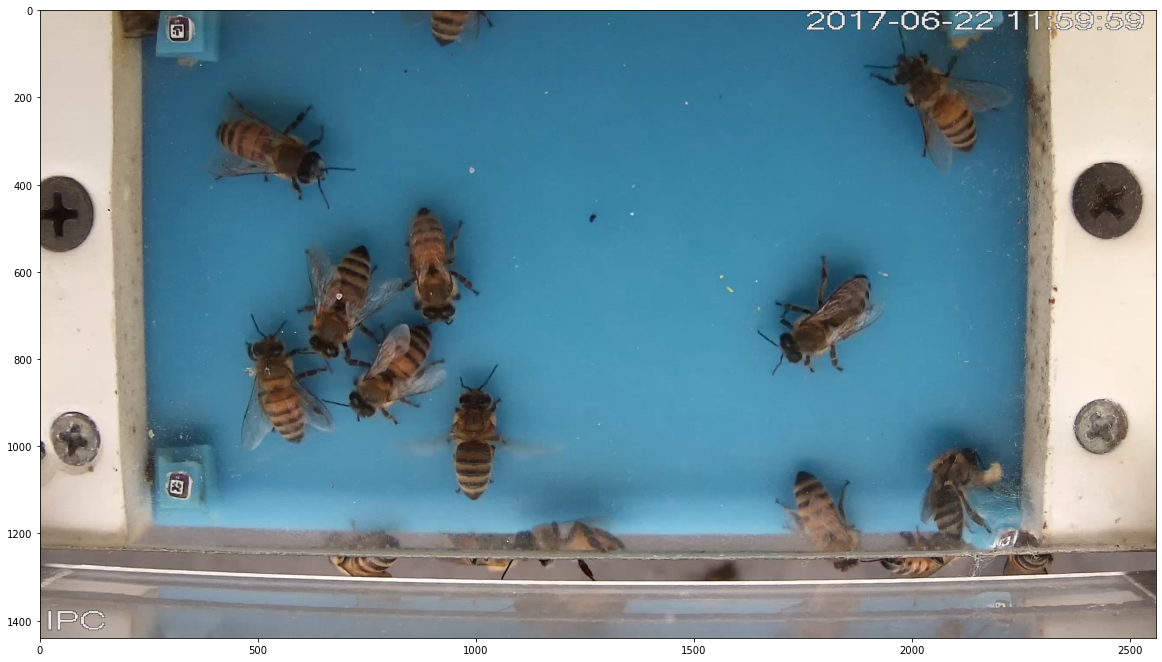

In [11]:
vplt.imshow(video[0])

### Plot a body

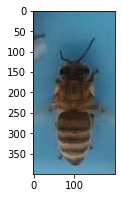

In [12]:
plt.figure(figsize=(4, 3))
vplt.imshow(video[0][0]);

### Plot Detections

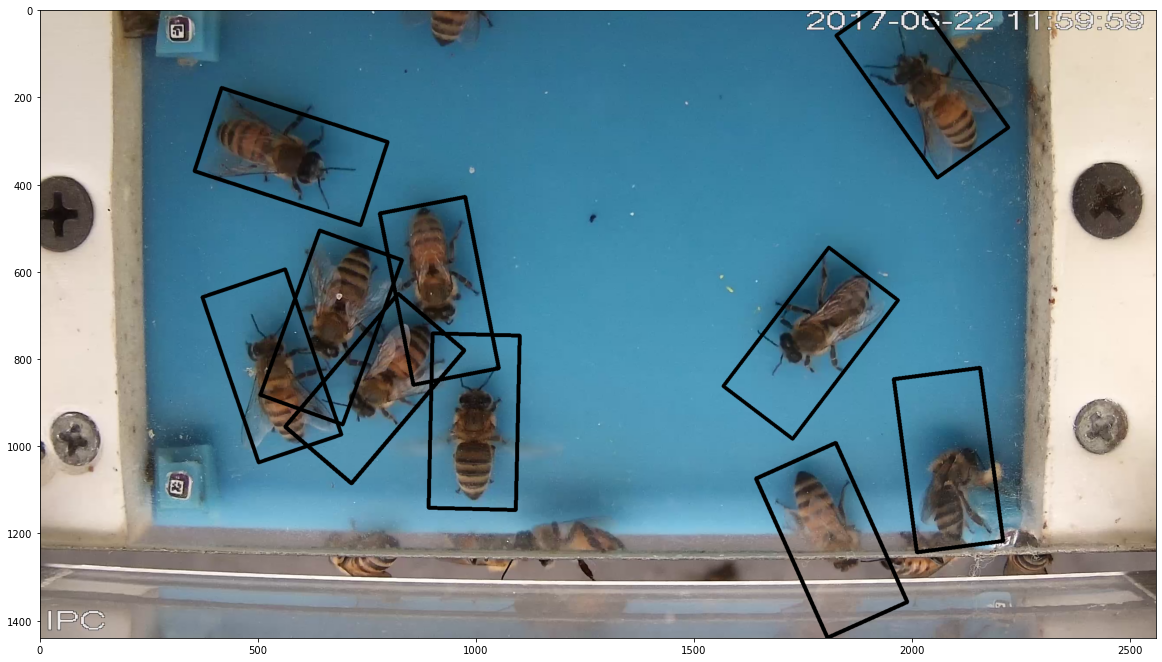

In [13]:
vplt.bbox(video[0]);

### Plot skeleton

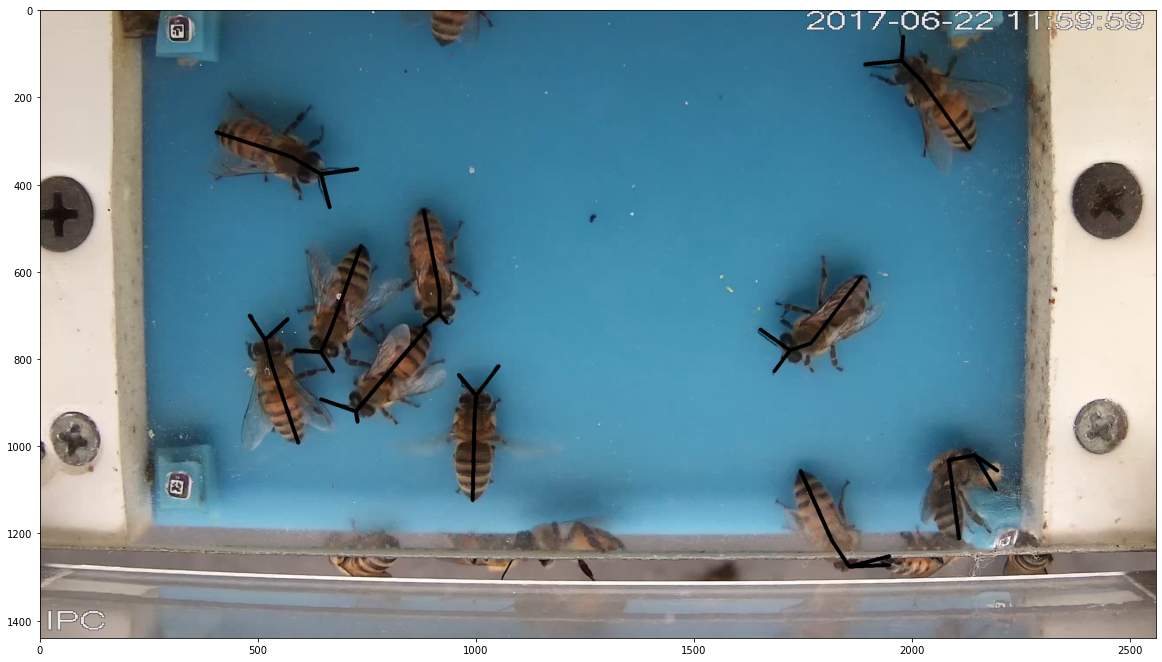

In [14]:
vplt.skeleton(video[0]);

### Tracking

Perform hugarian tracking.

In [38]:
video.hungarian_tracking()

100%|██████████| 5999/5999 [00:05<00:00, 1002.52it/s]


In [101]:
track_raw = hungarian_tracking_with_prediction(video, max_dist=150, 
                                       max_step=3, min_track_length=1,
                                       decay_alpha=0.5, 
                                       debug=False, progress=True)

  3%|▎         | 197/6000 [00:00<00:02, 1966.71it/s]

Tracking...


100%|██████████| 6000/6000 [00:02<00:00, 2097.43it/s]


Convert to Track format


Note that the bodies has id now.

In [74]:
video._tracks[2]._data[0].__dict__

{'_parts': {1: [(736, 540)],
  2: [(644, 784)],
  3: [(668, 728)],
  4: [(584, 780)],
  5: [(672, 828)]},
 '_center_part': 3,
 '_connections': [[1, 3], [3, 2], [2, 4], [2, 5]],
 '_frame': Frame: 0
 Body(id=0, parts={1: [(992, 1124)], 2: [(1000, 884)], 3: [(996, 944)], 4: [(1052, 816)], 5: [(960, 836)])
 Body(id=1, parts={1: [(1744, 1056)], 2: [(1856, 1276)], 3: [(1816, 1216)], 4: [(1948, 1272)], 5: [(1948, 1252)])
 Body(id=2, parts={1: [(736, 540)], 2: [(644, 784)], 3: [(668, 728)], 4: [(584, 780)], 5: [(672, 828)])
 Body(id=3, parts={1: [(404, 280)], 2: [(644, 376)], 3: [(576, 336)], 4: [(664, 452)], 5: [(728, 364)])
 Body(id=4, parts={1: [(592, 992)], 2: [(516, 756)], 3: [(532, 816)], 4: [(568, 708)], 5: [(480, 700)])
 Body(id=5, parts={1: [(884, 732)], 2: [(724, 920)], 3: [(768, 868)], 4: [(644, 892)], 5: [(728, 944)])
 Body(id=6, parts={1: [(1884, 612)], 2: [(1720, 780)], 3: [(1768, 764)], 4: [(1652, 732)], 5: [(1684, 828)])
 Body(id=7, parts={1: [(880, 460)], 2: [(916, 696)], 3: [

Now the skletons has color by id.

In [ ]:
vplt.skeleton(video[0]);

### Plotting Tracks

In [ ]:
vplt.tracks(video[50]); #default direction=Forward

In [ ]:
vplt.tracks(video[50], direction="FULL");

In [ ]:
vplt.tracks(video[50], direction="BACKWARD");

### Plot Everything with `vplt.imshow`

`min_parts` only plot detections with at least `min_parts` parts detected.

In [33]:
import io
import numpy as np
from tqdm import tqdm

In [76]:
def multiframe_bbox(video, frames, nx=4, axsize=(10,6)):
    ny=(len(F)+nx-1)//nx
    fig,axes = plt.subplots(ny,nx,figsize=(axsize[0]*nx,axsize[1]*ny))
    axes=axes.ravel()
    for k,f in enumerate(F):
        plt.sca(axes[k])
        vplt.imshow(video[f], bbox=True, skeleton=False, tracks=False, track_direction="BACKWARD", min_parts=1, idtext=True, fontScale=2.5, fontThickness=8);
        plt.title(f"Frame {f}")

In [57]:
def compare_bbox(video, video2, frames, nx=2, axsize=(10,6)):
    ny=(len(2*F)+nx-1)//nx
    fig,axes = plt.subplots(ny,nx,figsize=(axsize[0]*nx,axsize[1]*ny))
    axes=axes.ravel()
    for k,f in enumerate(F):
        plt.sca(axes[2*k])
        vplt.imshow(video[f], bbox=True, skeleton=False, tracks=False, track_direction="BACKWARD", min_parts=1, idtext=True, fontScale=2.5, fontThickness=8);
        plt.title(f"T1 - Frame {f}")
        plt.sca(axes[2*k+1])
        vplt.imshow(video2[f], bbox=True, skeleton=False, tracks=False, track_direction="BACKWARD", min_parts=1, idtext=True, fontScale=2.5, fontThickness=8);
        plt.title(f"T2 - Frame {f}")

In [ ]:
def multiframe_bbox_to_video(videofile, video, frames, figsize=(10,6)):
    #width=640
    #height=480
    DPI=64
    fig = plt.figure(figsize=figsize)
    width,height = figsize[0]*DPI,figsize[1]*DPI
    
#     io_buf = io.BytesIO()
#     fig.savefig(io_buf, format='raw', dpi=DPI)
#     io_buf.seek(0)
#     #print(width,height)
#     #print(int(fig.bbox.bounds[3]), int(fig.bbox.bounds[2]))
    
#     img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
#                          newshape=(height,width, -1))
#     io_buf.close()
#     #height,width,_ = img_arr.shape
#     #print(width,height)
            
    out = cv2.VideoWriter(videofile, cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 20, (width, height))
    try:
        for k,f in enumerate(frames):
            print(f"Frame {f}")
            plt.clf()
            vplt.imshow(video[f], bbox=True, skeleton=False, tracks=False, track_direction="BACKWARD", min_parts=1, idtext=True, fontScale=2.5, fontThickness=8);
            plt.title(f"Frame {f}")

            io_buf = io.BytesIO()
            fig.savefig(io_buf, format='raw', dpi=DPI)
            io_buf.seek(0)
            img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                                 newshape=(height,width, -1))
            
            frame = cv2.resize(img_arr,(width,height))
            
            out.write(frame)
            io_buf.close()
    finally:
            out and out.release()
            
def multiframe_bbox_to_images(outdir, filepattern, video, frames, figsize=(10,6)):
    #width=640
    #height=480
    DPI=64
    fig = plt.figure(figsize=figsize)
    width,height = figsize[0]*DPI,figsize[1]*DPI
    
    os.makedirs(outdir, exist_ok=True)
    
    for k,f in tqdm(enumerate(frames)):
        #print(f"Frame {f}")
        plt.clf()
        vplt.imshow(video[f], bbox=True, skeleton=False, tracks=False, track_direction="BACKWARD", min_parts=1, idtext=True, fontScale=2.5, fontThickness=8);
        plt.title(f"Frame {f}")

        io_buf = io.BytesIO()
        fig.savefig(io_buf, format='raw', dpi=DPI)
        io_buf.seek(0)
        img_arr = np.reshape(np.frombuffer(io_buf.getvalue(), dtype=np.uint8),
                             newshape=(height,width, -1))

        frame = cv2.resize(img_arr[...,[2,1,0]],(width,height))
        cv2.imwrite(join(outdir,filepattern.format(f)), frame)
            

In [ ]:
print(video[179])
print(video[180])
print(video[179][0].angle)
[(b.id,b.angle) for b in video[179]]

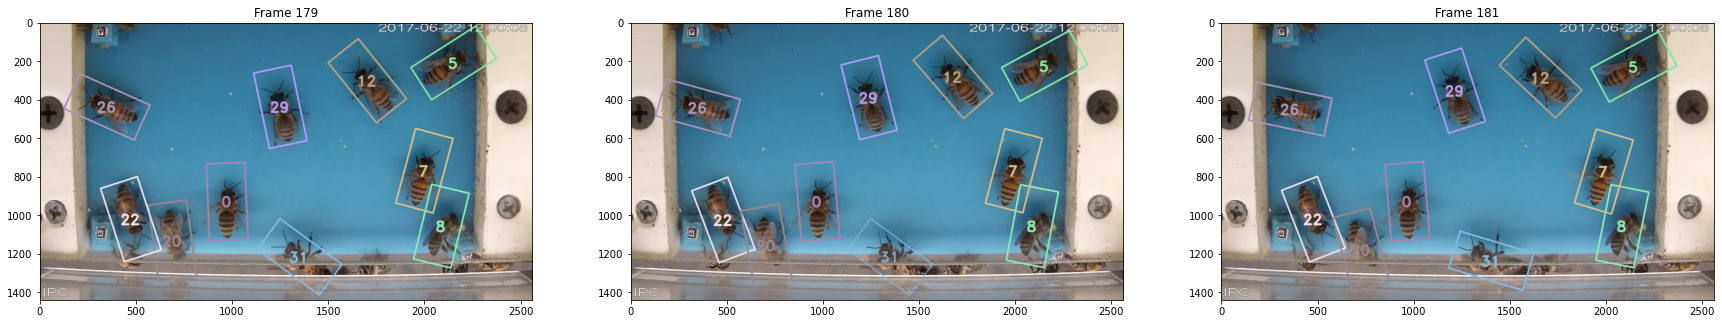

In [102]:
F=[179,180,181]
multiframe_bbox(video, F,nx=3)

1000it [12:17,  1.36it/s]


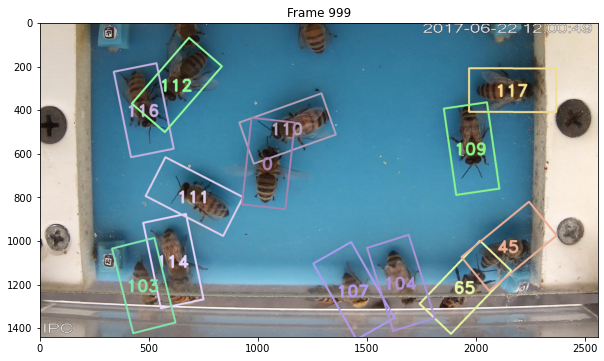

In [72]:
multiframe_bbox_to_images('/mnt/storage/work/rmegret/test/videoout-step3-dist150/', 'trackout-{}.jpg',
                          video, range(0,1000))

In [104]:
video[0:1000].export(os.path.join('/mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual/'), max_workers=40,
                   skeleton=False, bbox=True, tracks=False, min_parts=1, 
                   idtext=True, fontScale=2.5, fontThickness=8)

100%|██████████| 1000/1000 [04:18<00:00,  3.87it/s]


In [114]:
#!ffmpeg -y -r 20 -f image2 -s 640x384 -i /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual/trackout-%d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p -movflags faststart  /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual.mp4
#!ffmpeg -y -r 20 -f image2 -s 2560x1440 -i /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual/trackout-%d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p -movflags faststart  /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual.mp4
#!ffmpeg -y -r 20 -f image2 -s 1280x720 -i /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual/%09d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p -movflags faststart  /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual.mp4
!ffmpeg -y -r 20 -f image2 -i /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual/%09d.jpg -c:v libx264 -x264opts "keyint=10:min-keyint=10:no-scenecut" -crf 25 -pix_fmt yuv420p -movflags faststart -vf scale=1280x720 /mnt/storage/work/rmegret/test/videoout-step3-dist150-virtual2.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e

In [ ]:
multiframe_bbox_to_video('/home/rmegret/beeutils/text.mp4', video, [50,51,52,53])

In [87]:
!pwd

/mnt/storage/work/rmegret/plotbee/notebooks


### Get bodies overlapping at poitnt

In [ ]:
vplt.bbox(video[50], idtext=True)
plt.scatter(750, 455, color="r"); # An overlapping point

In [23]:
point = (750, 455)
video[50].bodies_at_point(point)

/Users/jchan/Projects/plotbee/plotbee/frame.py:248: UserWarning: More than one body in (750, 455) point.
  warnings.warn("More than one body in {} point.".format(p))


[Body(id=3, parts={1: [(768, 380)], 2: [(568, 244)], 3: [(640, 284)], 5: [(532, 256)]),
 Body(id=4, parts={1: [(440, 572)], 2: [(648, 484)], 3: [(576, 500)], 4: [(700, 540)], 5: [(700, 448)]),
 Body(id=14, parts={1: [(1020, 256)], 2: [(828, 468)], 3: [(872, 416)], 4: [(764, 452)], 5: [(828, 512)])]

## Common Functions

In [24]:
print(video)

Video(name=C02_170622120000.mp4, detections=merged_C02_170622120000_detections.json, len=6000)


In [25]:
len(video) # return the amount of frames

6000

Access to tracks:

In [26]:
tracks = video.tracks
# tracks #uncomment this

Access to frames:

In [27]:
frames = video.frames

In [28]:
for frame in video:
    pass # iterate throught frames

In [29]:
n = 10
nth_frame = video[n]
print(nth_frame)

Frame: 10
Body(id=0, parts={1: [(996, 1124)], 2: [(992, 880)], 3: [(996, 940)], 4: [(1044, 804)], 5: [(936, 848)])
Body(id=5, parts={1: [(896, 856)], 2: [(664, 864)], 3: [(740, 868)], 4: [(660, 820)], 5: [(652, 892)])
Body(id=1, parts={1: [(1860, 1084)], 2: [(1724, 1280)], 3: [(1776, 1220)])
Body(id=2, parts={1: [(692, 680)], 2: [(472, 608)], 3: [(528, 644)], 4: [(476, 536)], 5: [(440, 632)])
Body(id=3, parts={1: [(608, 424)], 2: [(824, 576)], 3: [(760, 540)], 4: [(832, 612)], 5: [(892, 564)])
Body(id=4, parts={1: [(492, 1028)], 2: [(544, 800)], 3: [(508, 868)], 4: [(600, 804)], 5: [(544, 764)])
Body(id=8, parts={1: [(2052, 1204)], 2: [(2152, 1012)], 3: [(2084, 1060)], 4: [(2196, 1060)], 5: [(2180, 1020)])
Body(id=6, parts={1: [(1516, 928)], 2: [(1344, 1148)], 3: [(1392, 1104)], 4: [(1260, 1148)], 5: [(1340, 1204)])
Body(id=7, parts={1: [(836, 616)], 2: [(1028, 724)], 3: [(964, 704)], 5: [(1100, 684)])


### Slicing Video

In [30]:
short_video = video[:10]
double_speed_video = video[::2]

len(short_video), len(double_speed_video)

(10, 3000)

## Frame API

In [31]:
frame = video[2] # 0 - (len(video) - 1)
type(frame)

plotbee.frame.Frame

The frame object contains body objects 

In [32]:
len(frame) # return the amount of body detected in this frame

10

In [33]:
print(frame)

Frame: 2
Body(id=0, parts={1: [(996, 1124)], 2: [(1004, 876)], 3: [(992, 944)], 4: [(1072, 836)], 5: [(984, 844)])
Body(id=2, parts={1: [(680, 528)], 2: [(688, 760)], 3: [(676, 696)], 4: [(660, 788)], 5: [(708, 792)])
Body(id=1, parts={1: [(1764, 1044)], 2: [(1824, 1280)], 3: [(1804, 1216)], 4: [(1924, 1276)], 5: [(1944, 1248)])
Body(id=5, parts={1: [(876, 784)], 2: [(656, 880)], 3: [(712, 864)], 4: [(608, 860)], 5: [(632, 920)])
Body(id=9, parts={1: [(2040, 216)], 2: [(1816, 104)], 3: [(1876, 140)], 4: [(1800, 44)], 5: [(1732, 104)])
Body(id=6, parts={1: [(1836, 668)], 2: [(1620, 760)], 3: [(1684, 752)], 4: [(1540, 732)], 5: [(1580, 844)])
Body(id=3, parts={1: [(512, 296)], 2: [(664, 508)], 3: [(624, 444)], 4: [(648, 544)], 5: [(700, 528)])
Body(id=4, parts={1: [(572, 1012)], 2: [(528, 784)], 3: [(540, 860)], 4: [(560, 728)], 5: [(504, 780)])
Body(id=8, parts={1: [(2096, 1212)], 2: [(2152, 1012)], 3: [(2084, 1044)], 4: [(2196, 1076)], 5: [(2180, 1024)])
Body(id=7, parts={1: [(884, 484

In [34]:
body = frame[0] # Accesing to the body

In [35]:
for body in frame:
    print(body.info())

{'id': 0, 'frame': 2, 'angle': 1.2730300200567113, 'x': 992, 'y': 944, 'parts_num': 5}
{'id': 2, 'frame': 2, 'angle': 178.6360724683971, 'x': 676, 'y': 696, 'parts_num': 5}
{'id': 1, 'frame': 2, 'angle': 193.09189306434686, 'x': 1804, 'y': 1216, 'parts_num': 5}
{'id': 5, 'frame': 2, 'angle': 116.00334584451144, 'x': 712, 'y': 864, 'parts_num': 5}
{'id': 9, 'frame': 2, 'angle': 65.13630342824813, 'x': 1876, 'y': 140, 'parts_num': 5}
{'id': 6, 'frame': 2, 'angle': 118.92642583525362, 'x': 1684, 'y': 752, 'parts_num': 5}
{'id': 3, 'frame': 2, 'angle': 217.1168606832703, 'x': 624, 'y': 444, 'parts_num': 5}
{'id': 4, 'frame': 2, 'angle': 11.888658039627975, 'x': 540, 'y': 860, 'parts_num': 5}
{'id': 8, 'frame': 2, 'angle': 4.085616779974877, 'x': 2084, 'y': 1044, 'parts_num': 5}
{'id': 7, 'frame': 2, 'angle': 180.0, 'x': 884, 'y': 672, 'parts_num': 5}


## Get the image

In [ ]:
plt.imshow(frame.image); # .image method

## Save the frame

In [37]:
# .save(folder, args) has the same args as .plot() and .image() plus the path to save.
# frame.save('frames/', args) # uncomment this to save the frame
frame.save('frames/', skeleton=True, bbox=True, min_parts=5, tracks=True)

## Body API

In [38]:
body = frame[0]
type(body)

plotbee.body.Body

In [39]:
print(body)

Body(id=0, parts={1: [(996, 1124)], 2: [(1004, 876)], 3: [(992, 944)], 4: [(1072, 836)], 5: [(984, 844)])


In [40]:
len(body) # return amount of detected parts of the body

5

In [41]:
print("Body id: {}, Frame id: {}".format(body.id, body.frameid))

Body id: 0, Frame id: 2


In [42]:
body.angle, body.center

(1.2730300200567113, (992, 944))

In [43]:
body.info()

{'id': 0,
 'frame': 2,
 'angle': 1.2730300200567113,
 'x': 992,
 'y': 944,
 'parts_num': 5}

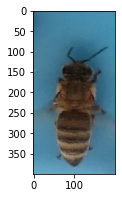

In [44]:
plt.figure(figsize=(4, 3))
vplt.imshow(body)

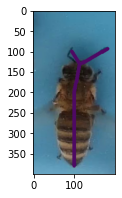

In [45]:
plt.figure(figsize=(4, 3))
vplt.skeleton(body)

## Exporting

In [ ]:
# this will call .save() to all the frame in the video.
video.export(os.path.join(OUTPUT_PATH, "video_images/"), max_workers=40,
                   skeleton=False, bbox=True, tracks=False, min_parts=1, 
                   idtext=True, fontScale=2.5, fontThickness=8)

To convert the folder to video used the follwing comand:

```
ffmpeg -r 60 -f image2 -s 1920x1080 -i video_images/%09d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p video.mp4
```

In [ ]:
# this will call .save() to all the bodies in all frames in the video.
# plus save a dataset.csv which is .info() + path to the image for all the bodies.
video.export_bodies(os.path.join(OUTPUT_PATH, "extract_bodies_with_json2/"), max_workers=20)

In [ ]:
video.save("save.json") # this will save the skeleton.json

In [26]:
!ffmpeg -y -r 20 -f image2 -s 640x384 -i /mnt/storage/work/rmegret/test/videoout/trackout-%d.jpg -vcodec libx264 -crf 25  -pix_fmt yuv420p -movflags faststart  /mnt/storage/work/rmegret/test/videoout.mp4

ffmpeg version 2.8.14-0ubuntu0.16.04.1 Copyright (c) 2000-2018 the FFmpeg developers
  built with gcc 5.4.0 (Ubuntu 5.4.0-6ubuntu1~16.04.9) 20160609
  configuration: --prefix=/usr --extra-version=0ubuntu0.16.04.1 --build-suffix=-ffmpeg --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --cc=cc --cxx=g++ --enable-gpl --enable-shared --disable-stripping --disable-decoder=libopenjpeg --disable-decoder=libschroedinger --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libopenjpeg --enable-libopus --enable-libpulse --enable-librtmp --enable-libschroedinger --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --e